In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import wavfile
from IPython import display

In [3]:
def sine_wave(f_0, sr=44100, a=1, sec=1):
    """
    create sine wave.
    
    Parameters
    ----------
    f_0 : int
        frequency [Hz]
    sr : int
        sampling rate [Hz]
    a : int
        amplitude
    sec : int
        seconds [s]
    
    Returns
    ----------
    s : list(float)
        sine wave
    """
    
    t = np.arange(0, sec, 1/sr)
    s = a * np.sin(2.0 * np.pi * f_0 * t)
    
    return s

In [19]:
def frequency_response(s, sr=44100):
    """
    analyze signal frequency with FFT
    
    Parameters
    ----------
    s : list[float]
        signal
    sr : int
        sampling rate
    
    Returns
    ----------
    amp : list
        amplitude
    freq : list
        frequency
    """
    
    # 信号を高速フーリエ変換(FFT)，時間領域から周波数領域に変換
    amp = np.abs(np.fft.fft(s))
    
    # 周波数の取得，np.fft.fftfreq(データ，サンプリング周波数)
    freq = np.fft.fftfreq(s.shape[0], d=1.0/44100)
    
    return amp, freq

In [16]:
def normal_plot(x, y, title):
    plt.plot(x, y)
    plt.title(title)

def plot_signal(t, s, title):
    plt.plot(t[:1000], s[:1000])
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(title)

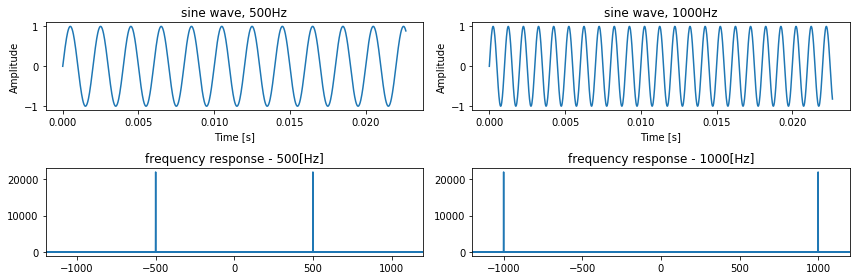

In [25]:
sec, sr = 1, 44100
t = np.arange(0, sec, 1/sr)  # 時間
s_500 = sine_wave(500)       # 500Hzのサイン波
s_1000 = sine_wave(1000)     # 1000Hzのサイン波

# 周波数特性()
amp_500, fr_500 = frequency_response(s_500)
amp_1000, fr_1000 = frequency_response(s_1000)

plt.figure(figsize=(12, 4))
plt.subplot(221)
plot_signal(t, s_500, 'sine wave, 500Hz')
plt.subplot(222)
plot_signal(t, s_1000, 'sine wave, 1000Hz')
plt.subplot(223)
normal_plot(fr_500, amp_500, 'frequency response - 500[Hz]')
plt.xlim(-1200, 1200)
plt.subplot(224)
normal_plot(fr_1000, amp_1000, 'frequency response - 1000[Hz]')
plt.xlim(-1200, 1200)

plt.tight_layout()
plt.show()